# Plot PowerAlphaBeta Test

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')

%matplotlib inline

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Replace this variable accordingly 
path_to_results_alpha = "../experiments/2018-11-06-13-48_PowerAlpha_/"
path_to_results_beta = "../experiments/2018-11-10-11-23_PowerBeta_/"

In [4]:
data_alpha = pd.read_csv(path_to_results_alpha + "PowerAlpha.csv", header=0)
data_alpha["category"] = [x.split("-")[0] for x in data_alpha["refId"]]

In [5]:
data_beta = pd.read_csv(path_to_results_beta + "PowerBeta.csv", header=0)
data_beta["category"] = [x.split("-")[0] for x in data_beta["refId"]]

In [6]:
print((data_alpha["refId"] == "refId").sum()) # must be 0 
print((data_beta["refId"] == "refId").sum()) # must be 0 

0
0


In [7]:
data_alpha["nDim"].unique()
# data_beta["nDim"].unique()

array([2, 3, 5])

In [8]:
data_alpha["noise"].unique()
# data_beta["noise"].unique()

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ])

In [9]:
data_alpha["category"].unique()
# data_beta["category"].unique()

array(['0', 'LinearThenDummy', 'LinearPeriodic_2', 'Linear', 'Sine_5',
       'LinearSteps_20', 'LinearPeriodic_5', 'LinearPeriodic_10',
       'Sine_2', 'LinearStairs_5', 'Hourglass', 'DoubleLinear_0.25',
       'DoubleLinear_0.5', 'Sine_20', 'Cross', 'HyperSphere',
       'NonCoexistence', 'Cubic_3', 'Sqrt_2', 'Parabolic_2',
       'RandomSteps_10', 'LinearPeriodic_20', 'LinearThenNoise', 'Sqrt_1',
       'LinearSteps_2', 'Sine_10', 'LinearStairs_10', 'RandomSteps_2',
       'Parabolic_3', 'Sqrt_3', 'Cubic_1', 'RandomSteps_5',
       'DoubleLinear_0.75', 'Parabolic_1', 'Hypercube', 'Cubic_2',
       'RandomSteps_20', 'LinearStairs_2', 'StraightLines',
       'LinearSteps_5', 'LinearSteps_10', 'LinearStairs_20', 'Z', 'Zinv',
       'HypercubeGraph', 'Star', 'Independent', 'Sine_1'], dtype=object)

## Plot Contrast
### Settings

In [218]:
selectedCategories = ['Linear','StraightLines', 'Independent'] # Must be 3 Cats

In [219]:
selectedTest = "MWP" # Must be 1 Test

In [220]:
selectedNoise = 0.0 # Must be one Noiselevel

In [235]:
varPara = "alpha" # Must be either or "alpha" or "beta"

if varPara == "alpha":
    data = data_alpha
elif varPara == "beta": 
    data = data_beta
else: 
    raise ValueError("varPara must be either or \"alpha\" or \"beta\"") 
    
selectedDims = data["nDim"].unique()
selectedDims # Must be 3 Dims

array([2, 3, 5])

### Plot

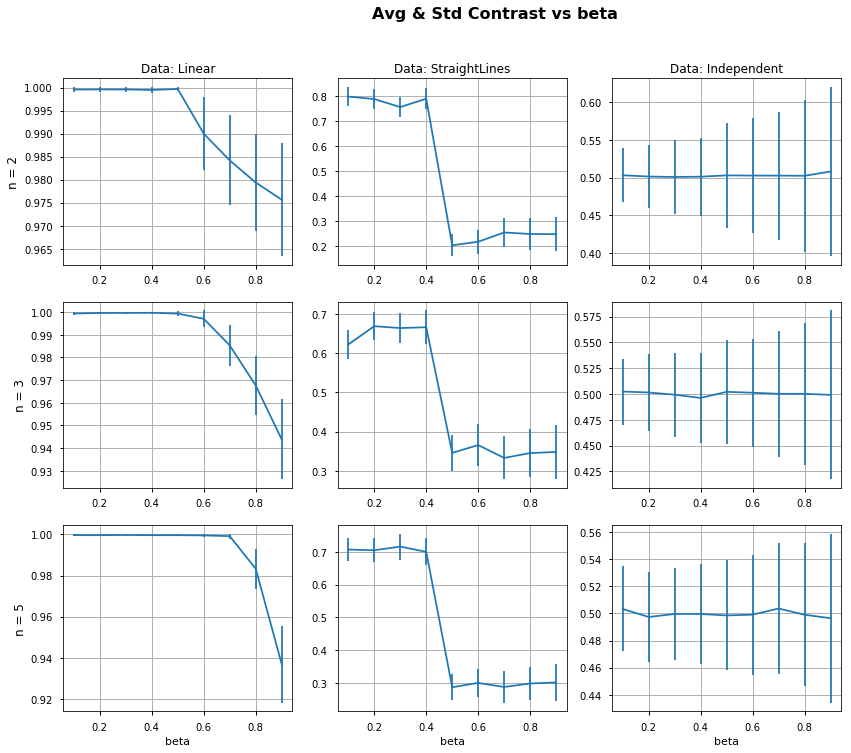

In [224]:
fig = plt.figure(figsize = (12,10)) # Adjust Size 
fig.suptitle("Avg & Std Contrast vs " + varPara, fontweight = "bold", fontsize = 16)

# 1 Row
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(331)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[0]), size = "large")
plt.title("Data: " + selectedCategories[0])
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(332)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.title("Data: " + selectedCategories[1])
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[0]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(333)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.title("Data: " + selectedCategories[2])
plt.grid(True)

# 2 Row 
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(334)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[1]), size = "large")
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(335)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[1]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(336)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.grid(True)

# 3 Row
subset = data[(data["category"] == selectedCategories[0]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(337)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.ylabel("n = " + str(selectedDims[2]), size = "large")
plt.xlabel(str(varPara))
plt.grid(True)
plt.subplots_adjust(bottom = 0.001, left = 0.0001)

subset = data[(data["category"] == selectedCategories[1]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(338)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.xlabel(str(varPara))
plt.grid(True)

subset = data[(data["category"] == selectedCategories[2]) & (data["nDim"] == selectedDims[2]) & (data["testId"] == selectedTest) & (data["noise"] == selectedNoise)]
plt.subplot(339)
plt.errorbar(x = subset[varPara], y = subset["avgContrast"], yerr = subset["stdContrast"])
plt.xlabel(str(varPara))
plt.grid(True)

# Saving 
savestring = ("Contrast " + varPara + "_Test " + selectedTest + "_" + selectedCategories[0] + " " + selectedCategories[1] + " " 
              + selectedCategories[2] + "_Noise " + str(selectedNoise))
savepath = "plots/AlphaBeta/"
fig.savefig(savepath + savestring + ".pdf", bbox_inches='tight')

## Plot Power95 for diffrent Alpha / Beta & Noise
### Settings

In [233]:
selectedCategorie_ = 'Independent' # Must be 1 Cat

selectedTest_ = "MWP" # Must be 1 Test

selectedDim_ = [2,3,5] # Must be 3 Dims 

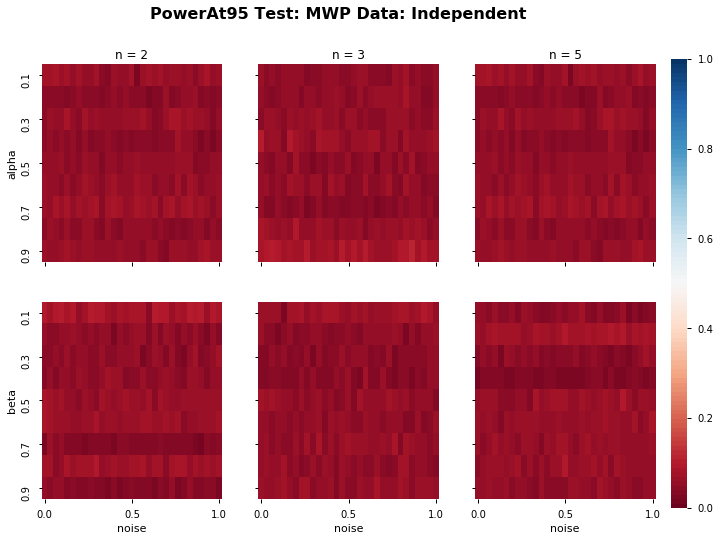

In [234]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (11,8), sharey=True, sharex=True)
fig.suptitle("PowerAt95 " + "Test: " + selectedTest_ + " Data: " + selectedCategorie_ , fontweight = "bold", fontsize = 16)

cbar_ax = fig.add_axes([.92, 0.11, .02, 0.78])
axes = axes.reshape(-1)


subset = data_alpha[(data_alpha["category"] == selectedCategorie_) & (data_alpha["nDim"] == selectedDim_[0]) & (data_alpha["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "alpha"]]
subdata = subdata.pivot(index = "alpha", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[0], cbar = True, cbar_ax = cbar_ax, vmin = 0, vmax = 1)
axes[0].set_xlabel("")
axes[0].set_title("n = " + str(selectedDim_[0]))

subset = data_alpha[(data_alpha["category"] == selectedCategorie_) & (data_alpha["nDim"] == selectedDim_[1]) & (data_alpha["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "alpha"]]
subdata = subdata.pivot(index = "alpha", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[1], cbar = False, vmin = 0, vmax = 1)
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("n = " + str(selectedDim_[1]))

subset = data_alpha[(data_alpha["category"] == selectedCategorie_) & (data_alpha["nDim"] == selectedDim_[0]) & (data_alpha["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "alpha"]]
subdata = subdata.pivot(index = "alpha", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[2], cbar = False, vmin = 0, vmax = 1)
axes[2].set_ylabel("")
axes[2].set_xlabel("")
axes[2].set_title("n = " + str(selectedDim_[2]))

# 2 row
subset = data_beta[(data_beta["category"] == selectedCategorie_) & (data_beta["nDim"] == selectedDim_[0]) & (data_beta["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "beta"]]
subdata = subdata.pivot(index = "beta", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[3], cbar = False, xticklabels= 15, vmin = 0, vmax = 1)

subset = data_beta[(data_beta["category"] == selectedCategorie_) & (data_beta["nDim"] == selectedDim_[1]) & (data_beta["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "beta"]]
subdata = subdata.pivot(index = "beta", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[4], cbar = False, xticklabels= 15, vmin = 0, vmax = 1)
axes[4].set_ylabel("")

subset = data_beta[(data_beta["category"] == selectedCategorie_) & (data_beta["nDim"] == selectedDim_[2]) & (data_beta["testId"] == selectedTest_)]
subdata = subset[["noise", "powerAt95", "beta"]]
subdata = subdata.pivot(index = "beta", columns = "noise", values = "powerAt95")
sns.heatmap(subdata, cmap=sns.color_palette("RdBu", 100), ax = axes[5], cbar = False, xticklabels= 15, yticklabels= 2, vmin = 0, vmax = 1)
axes[5].set_ylabel("")

# Saving 
savestring = ("PowerAt95_Test " + selectedTest_ + "_Data " + selectedCategorie_)
savepath = "plots/AlphaBeta/"
fig.savefig(savepath + savestring + ".pdf", bbox_inches='tight')